# Deep Learing Via ANN

Import the Library

In [1]:
import numpy as np
import pandas as pd

Import Dataset

In [3]:
df = pd.read_csv('American Express User Exit Prediction.csv')
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [4]:
print(X)

[[553 'Delhi' 'Female' ... 4 1 274150]
 [447 'Bengaluru' 'Male' ... 4 1 519360]
 [501 'Delhi' 'Female' ... 4 1 545501]
 ...
 [627 'Mumbai' 'Female' ... 4 0 494067]
 [600 'Bengaluru' 'Female' ... 2 1 109375]
 [553 'Delhi' 'Male' ... 4 1 180031]]


In [5]:
 print(y)

[0 0 0 ... 0 1 0]


# Encoding categorical Data

Gender Column : label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X[:, 2] = label.fit_transform(X[:, 2])

In [7]:
print(X)

[[553 'Delhi' 0 ... 4 1 274150]
 [447 'Bengaluru' 1 ... 4 1 519360]
 [501 'Delhi' 0 ... 4 1 545501]
 ...
 [627 'Mumbai' 0 ... 4 0 494067]
 [600 'Bengaluru' 0 ... 2 1 109375]
 [553 'Delhi' 1 ... 4 1 180031]]


Geography Column : one hot encoding

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[0.0 1.0 0.0 ... 4 1 274150]
 [1.0 0.0 0.0 ... 4 1 519360]
 [0.0 1.0 0.0 ... 4 1 545501]
 ...
 [0.0 0.0 1.0 ... 4 0 494067]
 [1.0 0.0 0.0 ... 2 1 109375]
 [0.0 1.0 0.0 ... 4 1 180031]]


Split Dataset into training & Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Implement ANN

Initialization

In [12]:
import tensorflow as tf
ANN = tf.keras.models.Sequential()

Adding input layer and first hidden layer

In [13]:
ANN.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding second hidden layer

In [14]:
ANN.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding output layer

In [15]:
ANN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# ANN Training

Compiling ANN

In [16]:
ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training Dataset

In [17]:
ANN.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3263 - loss: 0.8895
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.5949
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.5138
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4731
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4432
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4386
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.4210
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8088 - loss: 0.4207
Epoch 9/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4159
Epoch 10/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8175 - loss: 0.4108
Epoch 11/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.4142
Epoch 12/100
218/218 ━━━━━━━━━━━━━━━━━━━━

# Predictions

Prediction on Testset

In [19]:
y_pred = ANN.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Generate and print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc*100}")


Accuracy: 85.5320577374958
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2368
           1       0.77      0.42      0.54       611

    accuracy                           0.86      2979
   macro avg       0.82      0.69      0.73      2979
weighted avg       0.85      0.86      0.84      2979

ROC-AUC Score: 69.46597016410847


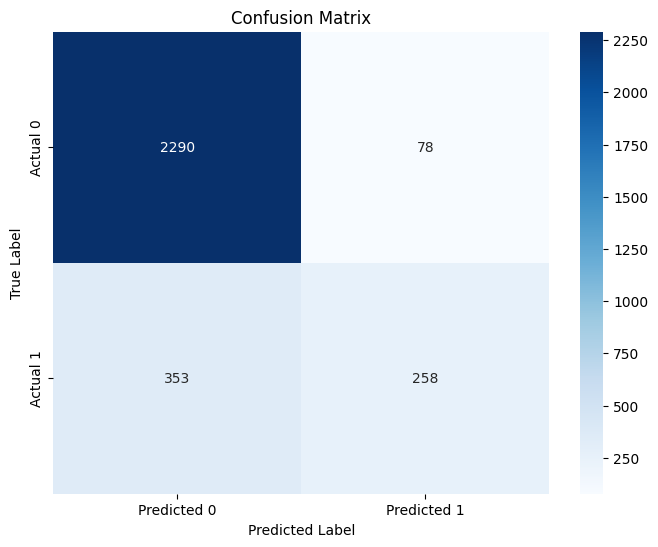

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
